In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

df = pd.read_csv('data/raw_data.csv')
df.drop(columns='Row Number', inplace=True)

df = df[['Area', 'Item', 'Year', 'Production', 'Import Quantity', 'Export Quantity']]
df.rename(columns={'Area': 'Country', 'Item':'Produce', 'Production':'Production Quantity'}, inplace=True)

df.head() 

,Country,Produce,Year,Production Quantity,Import Quantity,Export Quantity
0,Armenia,Potatoes,2000,290260.0,390.0,300.0
1,Armenia,Potatoes,2001,363834.0,2290.0,0.0
2,Armenia,Potatoes,2002,374263.0,1918.0,0.0
3,Armenia,Potatoes,2003,507518.0,2853.0,7.0
4,Armenia,Potatoes,2004,576427.0,1553.0,0.0


In [59]:
# create a lookup table for countries and their centroid locations
countries_lookup = pd.read_csv('data/country_centroids.csv')
set(df[~df['Country'].isin(countries_lookup['name'])]['Country'])

lookup = countries_lookup
lookup.rename(columns={'country':'code'}, inplace=True)
lookup.index = lookup['name']
(lookup.drop(columns=['name'])).to_csv('data/countries_lookup.csv')


# FIXME --------------------------------------------------------------------------
# ********************************************************************************
# Assuming that China is a sum of mainland, taiwan, hong kong and macao
# 'Serbia and Montenegro' - set coordinates to average of Serbia and Montenegro
# 'South Sudan' and 'Sudan (former)'- set coordinates to Sudan's coordinates

In [60]:
# remove the regions printed above from the dataframe
df = df[df['Country'].isin(countries_lookup['name'])]
df.index = df['Country']
df.drop(columns='Country', inplace=True)
df.to_csv('data/relevant_data.csv')

Empty DataFrame
Columns: [Country, Produce, Year, Production Quantity, Import Quantity, Export Quantity]
Index: []


In [29]:
# scenario 1: avacados in 2012
avacados_2012 = df[(df['Produce'] == 'Avocados') & (df['Year'] == 2012)]

# top 10 countries that exported avocados in 2012
avacados_2012_top10_export = avacados_2012.nlargest(10, 'Export Quantity')
avacados_2012_top10_export.to_csv('data/avacados_2012_top10_export.csv')
avacados_2012_top10_export

,Produce,Year,Production Quantity,Import Quantity,Export Quantity
Country,,,,,
Mexico,Avocados,2012,1316104.0,923.0,494481.0
Chile,Avocados,2012,160000.0,698.0,91527.0
Peru,Avocados,2012,268525.0,0.0,83576.0
Spain,Avocados,2012,76337.0,34060.0,65494.0
South Africa,Avocados,2012,91603.0,1660.0,54502.0
United States of America,Avocados,2012,238495.0,502546.0,29630.0
France,Avocados,2012,980.0,94500.0,18073.0
New Zealand,Avocados,2012,25500.0,1.0,11077.0
Ecuador,Avocados,2012,28600.0,1770.0,6048.0


In [30]:
# top 10 countries that imported avocados in 2012
avacados_2012_top10_import = avacados_2012.nlargest(10, 'Import Quantity')
avacados_2012_top10_import.to_csv('data/avacados_2012_top10_import.csv')
avacados_2012_top10_import

,Produce,Year,Production Quantity,Import Quantity,Export Quantity
Country,,,,,
United States of America,Avocados,2012,238495.0,502546.0,29630.0
France,Avocados,2012,980.0,94500.0,18073.0
Spain,Avocados,2012,76337.0,34060.0,65494.0
El Salvador,Avocados,2012,5250.0,13754.0,3.0
Costa Rica,Avocados,2012,1672.0,13731.0,95.0
Australia,Avocados,2012,48951.0,9627.0,2300.0
Argentina,Avocados,2012,4100.0,9179.0,117.0
Honduras,Avocados,2012,1258.0,9013.0,34.0
Morocco,Avocados,2012,54340.0,8817.0,1933.0


['#d7dfc0',
 '#c2d6af',
 '#aecfa2',
 '#98c698',
 '#82bc92',
 '#6fb08f',
 '#5fa38e',
 '#53958d',
 '#4a848b',
 '#437286',
 '#3f5f7f',
 '#3c4d73',
 '#393d65',
 '#342d53',
 '#2c1e3e']

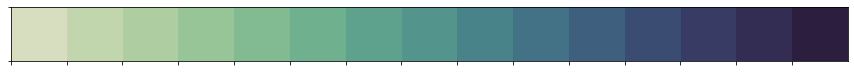

In [32]:
# palette generation
map_palette = sns.cubehelix_palette(15, start=.5, rot=-.75)
sns.palplot(map_palette)
map_palette.as_hex()